# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __Computational Thinking, Statistical Thinking, and First Steps with the Monte Carlo Method__ <br>

Author:      Tyler J. Brough <br>
Updated: September 22, 2021 <br>

---

<br>

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
students = ['Tyler Clayson', 'Marshall Day', 'Liz Giles', 'Connor Hoiland', 'Josie Hull',
            'Brian Kissmer', 'Andrew Martin', 'Jacob Needham', 'Tori Rallison', 'Emily Rice',
            'Chris Simiskey', 'Wes Smith', 'Andrew Walker', 'Austin Warr', 'Connor Waterman']


def draw_a_student(students: List[str]): 
    the_student = np.random.choice(students)
    print(f"{the_student}, come on down!")

In [3]:
draw_a_student(students)

Wes Smith, come on down!


<br>

---

### __Example 1:__ The Binomial Distribution

#### __Preliminary Bits__

<br>

__Bernoulli Trials:__ A set of $n$ independent binary variables in which the $j$th observation is either a 'success' or 'failure', with probability of success, $\theta$, being the same for all trials.

<br>

#### The __Binomial distribution__


<br>

The distribution of the number of _successes_, $X$, in a series of $n$-independent ___Bernoulli trials___ where the probability of success at each trial is $\theta$ and the probability of failure is $1 - \theta$. Specifically the distribution is given by

<br>

$$
\large{Pr(X = x) = \frac{n!}{x!(n-x)!} \theta^{x}(1 - \theta)^{n-x}, \quad x = 1, 2, \ldots, n}
$$

<br>

The mean, variance, skewness and kurtosis of the distribution are as follows:

<br>

$$
\begin{align}
\mbox{mean} &= n\theta \\
& \\
\mbox{variance} &= n\theta(1 - \theta) \\
& \\
\mbox{skewness} &= ((1 - \theta) - \theta) / (n\theta(1-\theta))^{\frac{1}{2}} \\
& \\
\mbox{kurtosis} &= 3 - \frac{6}{n} + \frac{1}{n\theta(1 - \theta)} \\
\end{align}
$$

<br>

In [4]:
np.random.binomial(n=10, p=0.5, size=1)

array([9])

In [10]:
M = 10_000
N = 50
theta = 0.5

heads = np.zeros(M)

## the main simulation loop
for i in range(M):
    heads[i] = np.random.binomial(n=N, p=theta)
    
(np.mean(heads), np.std(heads, ddof=1))

(25.0316, 3.584032082528958)

In [11]:
N * theta

25.0

In [12]:
np.sqrt(N * theta * (1. - theta))

3.5355339059327378

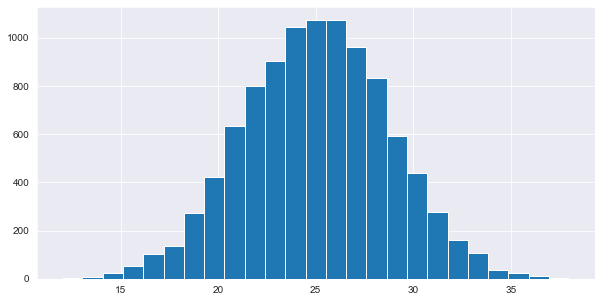

In [13]:
plt.hist(heads, bins=25);

<br>

__NB:__ We can actually vectorize this simulation quite simply as the following:

<br>

In [14]:
more_heads = np.random.binomial(n=N, p=theta, size=M)

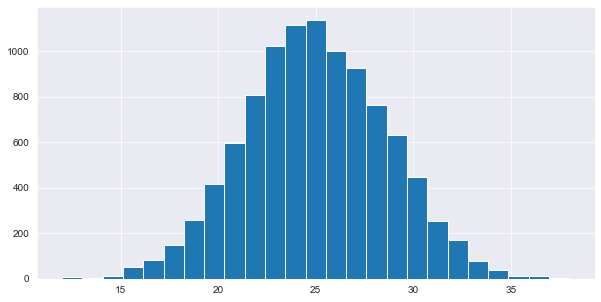

In [15]:
plt.hist(more_heads, bins=25);

<br>

__Q:__ What's the difference?

<br>


##### __Standarizing the Results__

<br>

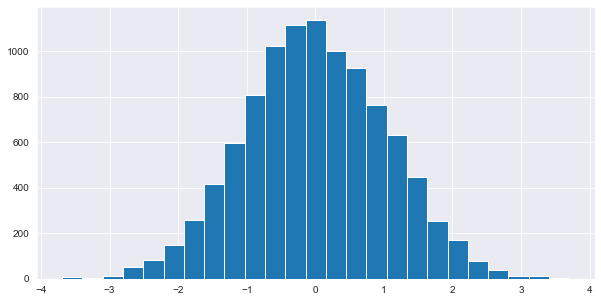

In [17]:
z_scores = (more_heads - np.mean(more_heads)) / np.std(more_heads, ddof=1)
plt.hist(z_scores, bins=25);

<br>

---

<br>

### __Example 2:__ The Poisson Distribution

<br>

#### The __Poisson Distribution__ 

<br>

The probability distribution of the number of occurrences, $X$, or some random event, in an interval of time or space. Given by

<br>

$$
\large{Pr(X = x) = \frac{e^{-\lambda} \lambda^{x}}{x!}, \quad x = 0, 1, \ldots}
$$

<br>

The mean and variance of the distribution are both $\lambda$. The skewness of the distribution is $1 / \sqrt{\lambda}$ and its kurtosis is $3 + 1 / \lambda$. The distribution is positively skewed for all values of $\lambda$. 

<br>

In [18]:
np.random.poisson?

Docstring:
poisson(lam=1.0, size=None)

Draw samples from a Poisson distribution.

The Poisson distribution is the limit of the binomial distribution
for large N.

.. note::
    New code should use the ``poisson`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
lam : float or array_like of floats
    Expectation of interval, must be >= 0. A sequence of expectation
    intervals must be broadcastable over the requested size.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``lam`` is a scalar. Otherwise,
    ``np.array(lam).size`` samples are drawn.

Returns
-------
out : ndarray or scalar
    Drawn samples from the parameterized Poisson distribution.

See Also
--------
Generator.poisson: which should be used for new code.

Notes
-----
The Poisson distribution



In [19]:
np.random.poisson(lam=4.5, size=10)

array([3, 6, 7, 8, 5, 6, 5, 8, 5, 2])

In [20]:
draw_a_student(students)

Liz Giles, come on down!


<br>

---

<br>

### __Example 3:__ The Exponential Distribution

<br>

<br>

#### __Preliminary Bits__

<br>

__Poisson Process:__ A point process with independent increments at constant intensity, say $\lambda$. The count after time $t$ has therefore a _Poisson distribution_ with mean $\lambda t$. 

<br>

__Point Process:__ A stochastic process concerned with the occurrence of events at points of time or space determined by some chance mechanism. 

<br>

#### The __Exponential Distribution__

<br>

The probability distribution $f(x)$ given by

<br>

$$
\large{f(x) = \lambda e^{-\lambda x}, \quad x > 0}
$$

<br>


The mean, variance, skewness, and kurtosis of the distribution are as follows:

<br>

$$
\begin{align}
\mbox{mean} &= 1 / \lambda \\
& \\
\mbox{variance} &= 1 / \lambda^{2} \\
& \\
\mbox{skewness} &= 2 \\
& \\
\mbox{kurtosis} &= 9 \\
& \\
\end{align}
$$

<br>

__NB:__ The distribution of intervals between independent consecutive random events, i.e. those following a ___Poisson process___.

<br>

<br>

__NB:__ `numpy` uses a different parameterization from the one above:

<br>

$$
f(x) = \frac{1}{\beta} e^{-\frac{1}{\beta}x}, \quad \mbox{which just substitutes} \quad \lambda = \frac{1}{\beta}
$$

<br>

In [21]:
np.random.exponential?

Docstring:
exponential(scale=1.0, size=None)

Draw samples from an exponential distribution.

Its probability density function is

.. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),

for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
The rate parameter is an alternative, widely used parameterization
of the exponential distribution [3]_.

The exponential distribution is a continuous analogue of the
geometric distribution.  It describes many common situations, such as
the size of raindrops measured over many rainstorms [1]_, or the time
between page requests to Wikipedia [2]_.

.. note::
    New code should use the ``exponential`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
scale : float or array_like of floats
    The scale parameter, :math:`\beta = 1/\lambda`. Must be
    non-negative.
size : int or tuple

In [23]:
np.random.exponential(scale = 4, size=10)

array([ 7.74817166,  0.20662234, 13.86399967,  2.37381879,  3.3842515 ,
        3.33131112,  0.79163617,  5.45713071,  0.18239155,  6.0066124 ])

In [24]:
draw_a_student(students)

Brian Kissmer, come on down!


<br>

---

<br>

### __A Simple Linear Regression: The Slope Coefficient__

<br>

Consider the following simple linear regression:

<br>

$$
\large{y_{i} = a + b x_{i} + \varepsilon_{t}}
$$

<br>

We are interested in the OLS estimate of the $b$ coefficient, $\hat{b}$, and its sampling distribution.

<br>